# Diffraction by a single slit
We show how to analyze diffractive effects using the different frames X, XY, XZ, XYZ.

In [21]:
import matplotlib.cm as cm

## X

In [9]:
from diffractio import degrees, mm, plt, np, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X

In [94]:
# Datos de lengths predeterminados
x0 = np.linspace(-200*um, 200*um, 1024*32)
wavelength = 0.6238 * um

In [106]:
# Clase fuentes
u1 = Scalar_source_X(x=x0, wavelength=wavelength)

# Iluminacion de onda plana
u1.plane_wave(A=1, theta=0)
# Clase masks

t1 = Scalar_mask_X(x=x0,  wavelength=wavelength)
# slit
t1.slit(x0=0, size=50 * um)
# Campo transmitido
u2 = u1 * t1

In [109]:
u3=u2.RS(z=5*mm, new_field=True)

('Good result: factor ', 1232.2631787644398)


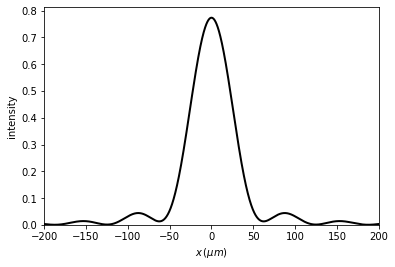

In [110]:
u3.draw(kind='intensity')

## XY

In [48]:
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.utils_drawing import draw_several_fields

In [111]:
# Datos de lengths predeterminados

x0 = np.linspace(-200*um, 200*um, 1024)
y0 = np.linspace(-200*um, 200*um, 1024)

# Longitud de onda predeterminada
wavelength = 0.6238 * um

(<Figure size 360x324 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7fa8f188ae80>)

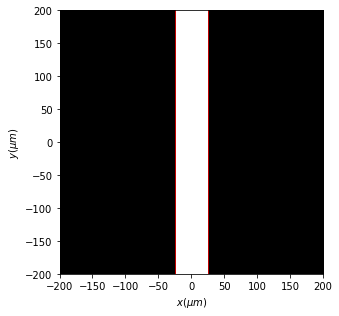

In [112]:
# Clase fuentes
u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
# Iluminacion de onda plana
u1.plane_wave(A=1, theta=sp.pi / 2, phi=0 * degrees)
# Clase masks
t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
# slit
t1.slit(x0=0, size=50 * um, angle=0 * degrees)
# Campo transmitido
u2 = u1 * t1
# Campo difracta
u2.draw(kind='intensity')

In [121]:
u3=u2.RS(z=5*mm, new_field=True)

(<Figure size 360x324 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7fa8f198a1d0>)

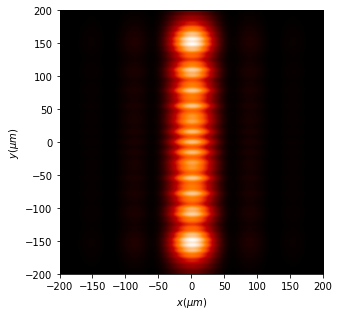

In [122]:
u3.draw(kind='intensity', logarithm=True)

In [80]:
u3 = u2.fft(remove0=False, new_field=True)
# Representacion

In [60]:
u3.cut_resample(
    x_limits='',
    y_limits=(-20*um,20*um),
    num_points=[1024,1024])

In [ ]:
draw_several_fields(
    fields=(u2, u3),
    titulos=('mask', 'fft'),
    title='length',
    logarithm=True,
    normalize='maximum')
plt.set_cmap(cm.gray_r)
# profiles
point1 = (u3.x.min() / 2, 0)
point2 = (u3.x.max() / 2, 0)

In [83]:
u3.u.shape

(1024, 1024)

In [85]:
u3.draw_profile(
    point1=(u3.x[0], u3.x[-1]),
    point2=(0,0),
    kind='intensity',
    order=0
)

0 511 1023 511


IndexError: index 1023 is out of bounds for axis 0 with size 1000

## XZ

In [123]:
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ



In [149]:
x = np.linspace(-100*um, 100*um, 1024)
z = np.linspace(-25*um, 2000*um, 1024)
wavelength = 0.6238 * um

u1 = Scalar_source_X(x=x,  wavelength=wavelength)
u1.plane_wave(theta=0)

t0= Scalar_mask_X(x=x,  wavelength=wavelength)
t0.slit(x0=0, size=100 * um)

array([0., 0., 0., ..., 0., 0., 0.])

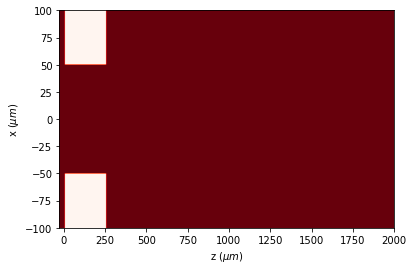

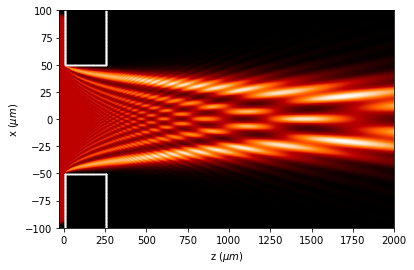

In [150]:
t1 = Scalar_mask_XZ(x=x, z=z, wavelength=wavelength, n_background=1)
z0 = 10 * um
z1 = z0+250 * um
v_globals = dict(z0=z0, z1=z1)
t1.convert_mask(
    t=t0, z0=z0, z1=z1, refraction_index=1.5+2j, v_globals=v_globals)
t1.draw_refraction_index(draw_borders=False, )

# Campo transmitido
t1.incident_field(u1)

t1.BPM()
# Campo difracta
t1.draw(kind='intensity', draw_borders=True)

In [151]:
u_final=t1.final_field()

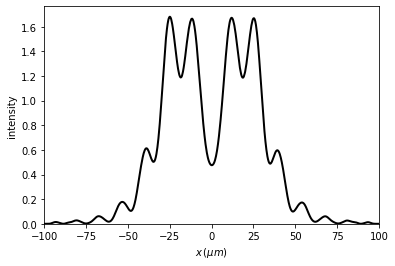

In [152]:
u_final.draw()

Now, let us concentrate around the thick edge.

In [153]:
t2=t1.cut_resample(
    x_limits='',
    z_limits=(-5*um, 350*um),
    num_points=[])

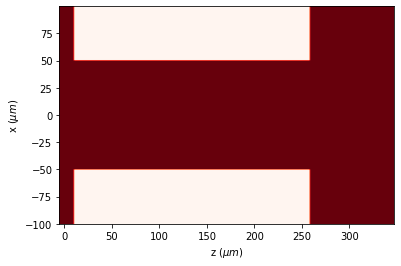

In [154]:
t1.draw_refraction_index(draw_borders=False, )


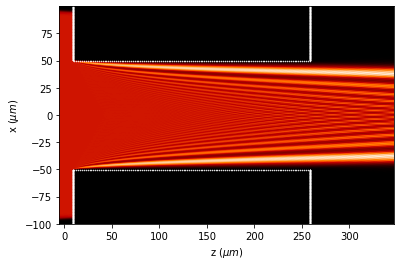

In [155]:
t1.draw(kind='intensity', draw_borders=True)
